# Data-X Spring 2018: Homework 05

### Linear regression, logistic regression, matplotlib.


In this homework, you will do some exercises with prediction and plotting. 

REMEMBER TO DISLPAY ALL OUTPUTS. If the question asks you to do something, make sure to print your results so we can easily see that you have done it.


# NAME: Shubei Wang
# ID: 3034358656

## Part 1 - Regression


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1.1
Read the data file in python. Check if there are any NaN values, and print the results.

Describe data features in terms of type, distribution range (max and min), and mean values. 

Plot feature distributions. This step should give you clues about data sufficiency.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

data = pd.read_csv("Energy.csv")
bl = data.isnull().any().any()

if(bl==False):
    print("There are no NaN values.")
else:
    print("There are NaN values.")

There are no NaN values.


X1: type=float64, max=0.98, min=0.62, mean=0.7641666666666677
X2: type=float64, max=808.5, min=514.5, mean=671.7083333333334
X3: type=float64, max=416.5, min=245.0, mean=318.5
X4: type=float64, max=220.5, min=110.25, mean=176.60416666666666
X5: type=float64, max=7.0, min=3.5, mean=5.25
X6: type=int64, max=5, min=2, mean=3.5
X7: type=float64, max=0.4, min=0.0, mean=0.23437500000000186
X8: type=int64, max=5, min=0, mean=2.8125


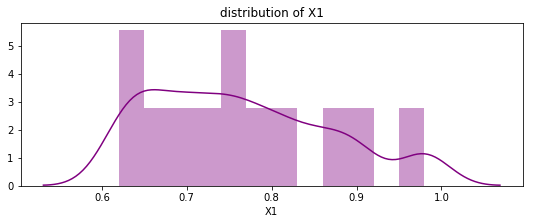

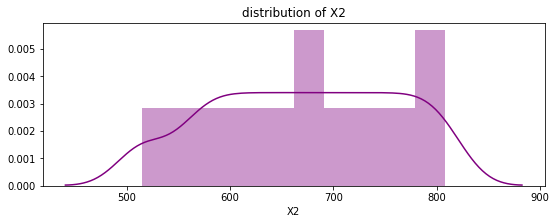

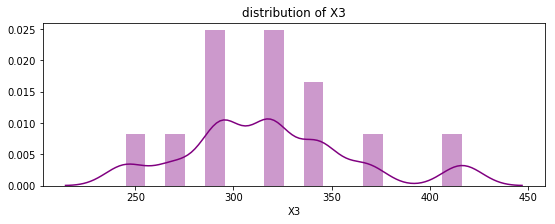

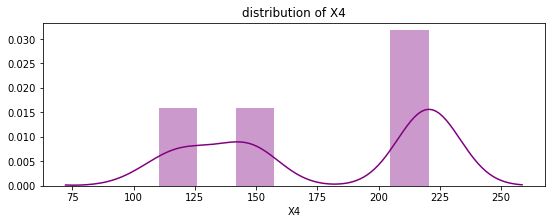

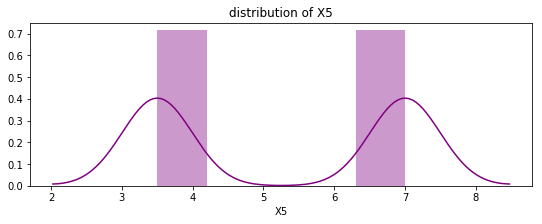

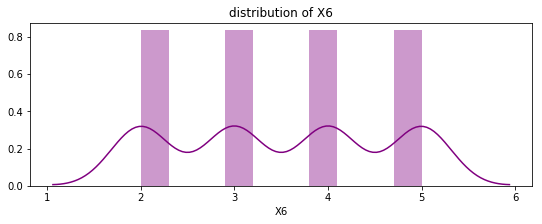

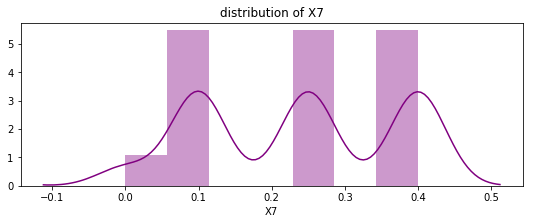

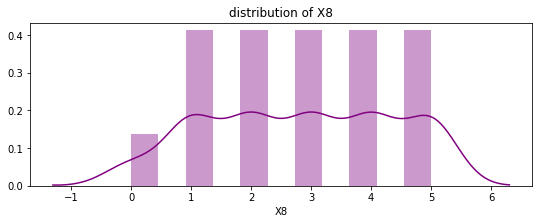

In [41]:
import warnings
warnings.filterwarnings('ignore')

for feature in data.columns[:-1]:
    data1 = data[feature]
    tp = np.dtype(data1)
    mx = max(data1)
    mn = min(data1)
    ave = np.mean(data1)
    print("%s: type=%s, max=%s, min=%s, mean=%s" % (feature, tp, mx, mn, ave))
    plt.figure(figsize=(9,3))
    sns.distplot(data1,color='purple')
    plt.title("distribution of %s" % feature)
    

 __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.  

__Q 1.2: Train a linear regression model on 80 percent of the given dataset, what is the intercept value and coefficient values.__



In [42]:
import random

LinearRegressionModel= linear_model.LinearRegression()

# randomly choose 80% of the orginal dataset as the training set
n = int(0.8*len(data.index))
train = sorted(random.sample(list(data.index),n))

# compute the linear regression model
x = data.iloc[train,:-1].values
y = data.iloc[train,-1].values
LinearRegressionModel.fit(x, y)

print("intercept = %s, coefficient = %s" %(LinearRegressionModel.intercept_,LinearRegressionModel.coef_))

intercept = 88.13177845485714, coefficient = [-6.48507164e+01 -6.65270599e-02  3.92742452e-02 -5.29006525e-02
  3.85115362e+00 -8.11789161e-02  1.96981705e+01  2.25579659e-01]



#### Q.1.3: Report model performance using 'ROOT MEAN SQUARE' error metric on:  
__1. Data that was used for training(Training error)__   
__2. On the 20 percent of unseen data (test error) __ 



In [43]:
z = LinearRegressionModel.predict(x)
RMSE_train = np.sqrt(np.mean((z - y) ** 2))

test = data.drop(train)
x1 = test.iloc[:,:-1].values
y1 = test.iloc[:,-1].values
z1 = LinearRegressionModel.predict(x1)
RMSE_test = np.sqrt(np.mean((z1 - y1) ** 2))

print("traing error = %s, test error = %s" %(RMSE_train,RMSE_test))

traing error = 2.907478269518706, test error = 2.9894785249901883



#### Q1.4: 

Lets us see the effect of amount of data on the performance of prediction model. Use varying amounts of  Training data (100,200,300,400,500,all) to train regression models and report  training error and validation error in each case. Validation data/Test data  is the same as above for  all  these cases.

**Plot error rates vs number of training examples.** Both the training error and the validation error should be plotted. Comment on the relationship you observe in the plot, between the amount of data used to train the model and the validation accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

Text(0,0.5,'error rates')

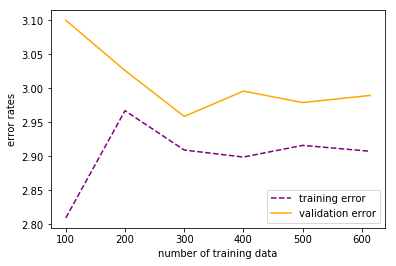

In [44]:
total = set(train)
number = np.array([100,200,300,400,500,614])
train_error = np.zeros(6)
test_error = np.zeros(6)
for i,num in enumerate(number):
    
    #extract training set
    training = sorted(random.sample(total,num))
    x = data.iloc[training,:-1].values
    y = data.iloc[training,-1].values
    
    LinearRegressionModel.fit(x, y)
    
    z = LinearRegressionModel.predict(x)
    z1 = LinearRegressionModel.predict(x1)
    train_error[i] = np.sqrt(np.mean((z - y) ** 2))
    test_error[i] = np.sqrt(np.mean((z1 - y1) ** 2))
    
fig, ax = plt.subplots()

ax.plot(number, train_error, color='purple',linestyle='--',label='training error')
ax.plot(number, test_error, color='orange',label='validation error')
ax.legend(loc=4)
ax.set_xlabel('number of training data')
ax.set_ylabel('error rates')

# Comment:
From the plot above I find that in general the validation error decreases as the amount of training data increases.

## Part 2 - Classification


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance. You can also output the probabilities of an instance belnging to a class.  

__ Q 2.1:  Bucket values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:__ 

0: 'Low' ( < 14),   
1: 'Medium'  (14-28),   
2: 'High'  (>28)

This converts the given dataset  into a classification problem, classes being, Heating load is: *low, medium or high*. Use this datset with transformed 'heating load' for creating a  logistic regression classifiction model that predicts heating load type of a building. Use test-train split ratio of 0.8 : 0.2.  

*Report training and test accuracies and  confusion matrices.*


**HINT:** Use pandas.cut

In [45]:
data['Y1'] = pd.cut(data['Y1'],bins=[float('-inf'),14,28,float('inf')],labels=['Low','Medium','High'])

In [46]:
x = data.iloc[:,:-1]
y = data['Y1']
y=y.map({'Low': 0, 'Medium': 1,'High' :2})

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

from sklearn import linear_model
LogisticRegressionModel = linear_model.LogisticRegression()

LogisticRegressionModel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
training_accuracy=LogisticRegressionModel.score(x_train,y_train)
print ('training accuracy:',training_accuracy)
test_accuracy=LogisticRegressionModel.score(x_test,y_test)
print('testing accuracy: ',test_accuracy)

training accuracy: 0.8078175895765473
testing accuracy:  0.7727272727272727


In [48]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = LogisticRegressionModel.predict(x_test)
ConfusionMatrix=pd.DataFrame(confusion_matrix(y_true, y_pred),columns=['Predicted 0','Predicted 1','Predicted 2'],index=['Actual 0','Actual 1','Actual 2'])
print ('Confusion matrix of test data is: \n',ConfusionMatrix)

Confusion matrix of test data is: 
           Predicted 0  Predicted 1  Predicted 2
Actual 0           42            1            0
Actual 1            9           22           25
Actual 2            0            0           55


__ Q2.2: 
One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. 
This makes training less sensitive to the scale of features . 
Scaling is important in algorithms that use distance based classification, SVM or K means or those that involve gradient descent optimization. If we  Scale features in the range [0,1] it is called unity based normalization.__

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [49]:
df = data.copy()

In [50]:
#perform unity based normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
new_feature = min_max_scaler.fit_transform(df.iloc[:,:-1].values)

for i,x in enumerate(df.columns[:-1]):
    df[x] = new_feature[:,i]

In [51]:
x = df.iloc[:,:-1]
y = df['Y1']
y=y.map({'Low': 0, 'Medium': 1,'High' :2})

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

from sklearn import linear_model
LogisticRegressionModel = linear_model.LogisticRegression()
LogisticRegressionModel.fit(x_train,y_train)

training_accuracy=LogisticRegressionModel.score(x_train,y_train)
print ('new training accuracy:',training_accuracy)
test_accuracy=LogisticRegressionModel.score(x_test,y_test)
print('new testing accuracy: ',test_accuracy)

from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = LogisticRegressionModel.predict(x_test)
ConfusionMatrix=pd.DataFrame(confusion_matrix(y_true, y_pred),columns=['Predicted 0','Predicted 1','Predicted 2'],index=['Actual 0','Actual 1','Actual 2'])
print ('new confusion matrix of test data is: \n',ConfusionMatrix)

new training accuracy: 0.8224755700325733
new testing accuracy:  0.8116883116883117
new confusion matrix of test data is: 
           Predicted 0  Predicted 1  Predicted 2
Actual 0           40            3            0
Actual 1            2           30           24
Actual 2            0            0           55


# Comment:
After preprocessing the features, both training accuracy and testing accuracy increase. This
adjusted model performs better on the data set.

## Part 3 - Matplotlib

**Q 3.1a. Create a dataframe called `icecream` that has column `Flavor` with entries `Strawberry`, `Vanilla`, and `Chocolate` and another column with `Price` with entries `3.50`, `3.00`, and `4.25`. **

In [52]:
data = {'Flavor':['Strawberry', 'Vanilla', 'Chocolate'],'Price':[3.50,3.00,4.25]}
icecream = pd.DataFrame(data)

**Q 3.1b 
Create a bar chart representing the three flavors and their associated prices.**

<BarContainer object of 3 artists>

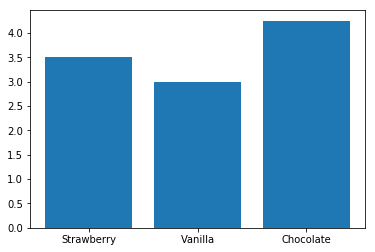

In [53]:
f, ax = plt.subplots()
ax.bar(icecream['Flavor'],icecream['Price'])

**Q 3.2   Create 9 random plots (Hint: There is a numpy function for generating random data). The top three should be scatter plots (one with green dots, one with purple crosses, and one with blue triangles. The middle three graphs should be a line graph, a horizontal bar chart, and a histogram. The bottom three graphs should be trignometric functions (one sin, one cosine, one tangent).**

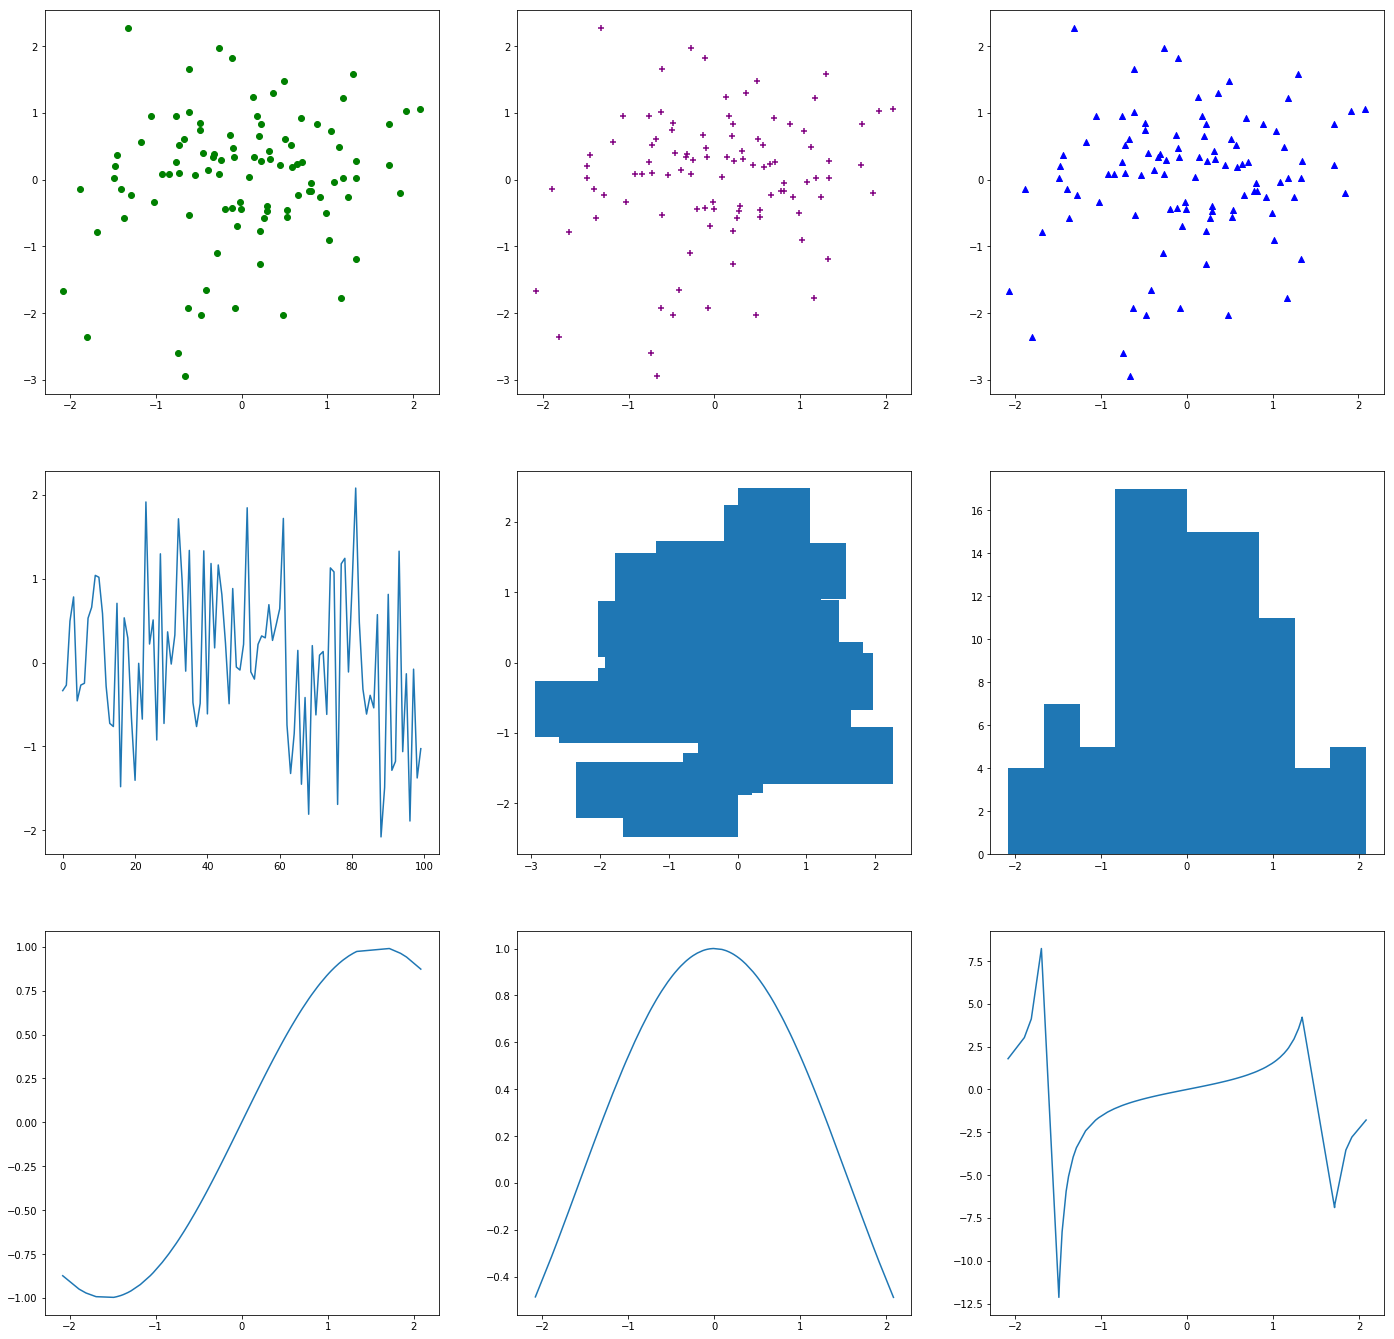

In [55]:
f, ax = plt.subplots(ncols=3,nrows=3)
x = np.random.randn(100)
y = np.random.randn(100)

plt.rcParams['figure.figsize'] = (24,24)
ax[0,0].scatter(x,y,c='green')
ax[0,1].scatter(x,y,c='purple',marker='+')
ax[0,2].scatter(x,y,c='blue',marker='^')
ax[1,0].plot(x)
ax[1,1].barh(x,y)
ax[1,2].hist(x)
ax[2,0].plot(sorted(x),np.sin(sorted(x)))
ax[2,1].plot(sorted(x),np.cos(sorted(x)))
ax[2,2].plot(sorted(x),np.tan(sorted(x)))